In [1]:
import pandas as pd

**Question 1**

In [3]:
rs = pd.read_csv(r"retail_sales_dataset.csv")
print(rs.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
rs_copy = rs.copy()    #to create a copy

**Question 2**

In [6]:
rs.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [7]:
rs.shape           #no of rows and columns in a data

(1000, 9)

In [8]:
rs.info()                  #orivides information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
rs.describe()                    #perform basic calculations on quantative data

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


**Question 3**

In [12]:
rs.dtypes           #shows each column’s data type (int64, float64, object, etc.).

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                    category
Age                          int64
Product Category          category
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [13]:

rs['Date'] = pd.to_datetime(rs['Date'], errors='coerce')              # Convert Date to datetime

rs['Customer ID'] = rs['Customer ID'].astype(str)                      # Convert Customer ID to string (explicit)

rs['Gender'] = rs['Gender'].astype('category')                         # Convert Gender & Product Category to categorical
rs['Product Category'] = rs['Product Category'].astype('category')

# Verify the new dtypes
print(rs.dtypes)


Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                    category
Age                          int64
Product Category          category
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


**Question 4**

In [15]:
rs.duplicated().sum()        #check for duplicated rows

np.int64(0)

**Question 5**

In [18]:
rs.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Computed_Total
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100


In [19]:
                                                                              # Compute total in-memory
rs["Computed_Total"] = rs["Quantity"] * rs["Price per Unit"]

                                                                              # Compare row by row
print((rs["Computed_Total"] == rs["Total Amount"]).value_counts())

                                                                              # Compare overall totals
print("Match?:", rs["Computed_Total"].sum() == rs["Total Amount"].sum())


True    1000
Name: count, dtype: int64
Match?: True


**Question 6**

In [22]:
# Group by Customer ID
customer_summary = rs.groupby("Customer ID").agg(
    Total_Spend = ("Total Amount", "sum"),
    Purchases   = ("Transaction ID", "count")
)

In [23]:
customer_summary.head()

,Total_Spend,Purchases
Customer ID,,
CUST001,150,1
CUST002,1000,1
CUST003,30,1
CUST004,500,1
CUST005,100,1


**Question 7**

In [24]:
customer_summary[customer_summary["Purchases"] > 5]

,Total_Spend,Purchases
Customer ID,,


**Question 8**

In [27]:
mean_totalamount = rs["Total Amount"].mean()

In [28]:
mean_totalamount

np.float64(456.0)

**Question 9**

In [31]:
# Group by Product Category and sum Total Amount
top5_categories = (
    rs.groupby("Product Category", as_index=False)["Total Amount"]
      .sum()
      .sort_values(by="Total Amount", ascending=False)
      
)

print(top5_categories.head(5))


  Product Category  Total Amount
2      Electronics        156905
1         Clothing        155580
0           Beauty        143515


C:\Users\PC\AppData\Local\Temp\ipykernel_20248\1375387597.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rs.groupby("Product Category", as_index=False)["Total Amount"]


**Question 10**

In [32]:
# Group by Product Category and sum Total Amount
top5_customers = (
    rs.groupby("Customer ID", as_index=False)["Total Amount"]
      .sum()
      .sort_values(by="Total Amount", ascending=False)
      
)

print(top5_customers.head(5))


    Customer ID  Total Amount
14      CUST015          2000
412     CUST412          2000
970     CUST970          2000
547     CUST547          2000
281     CUST281          2000


**Question 11**

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

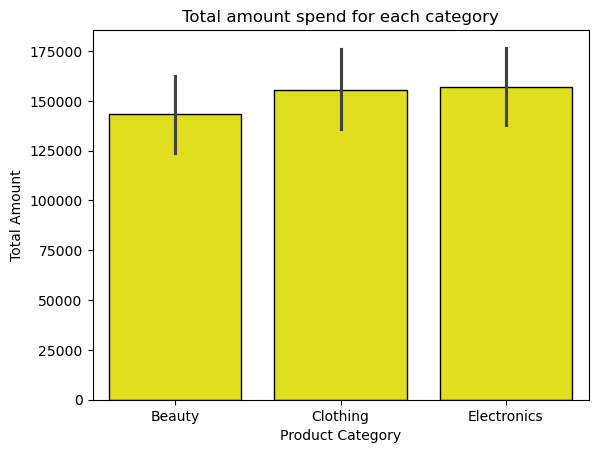

In [36]:
sns.barplot(x = "Product Category", y = "Total Amount", data = rs, estimator=sum, edgecolor = "black", color = "yellow")
plt.title("Total amount spend for each category")
plt.show()

**Question 12**

In [37]:
# 1. Convert Date column to datetime (important!)
rs["Date"] = pd.to_datetime(rs["Date"])

# 2. Resample by month and aggregate Total Amount
monthly_totals = rs.resample("M", on="Date")["Total Amount"].sum()
monthly_totals.index = monthly_totals.index.strftime("%b")

print(monthly_totals)


Date
Jan    35450
Feb    44060
Mar    28990
Apr    33870
May    53150
Jun    36715
Jul    35465
Aug    36960
Sep    23620
Oct    46580
Nov    34920
Dec    44690
Jan     1530
Name: Total Amount, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_20248\3605052807.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_totals = rs.resample("M", on="Date")["Total Amount"].sum()


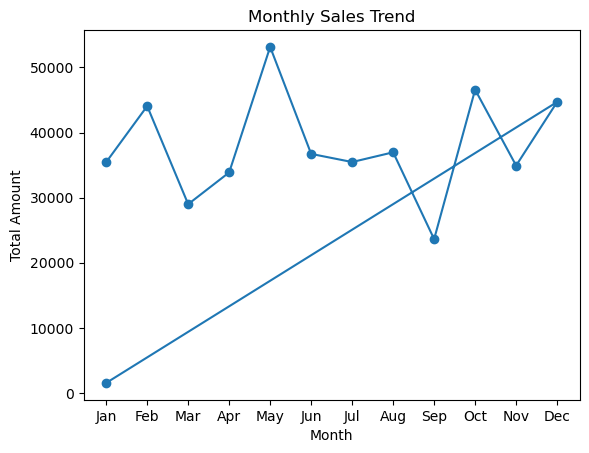

In [ ]:
plt.plot(monthly_totals, marker = 'o')
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.title("Monthly Sales Trend")
plt.show()


**Question 13**

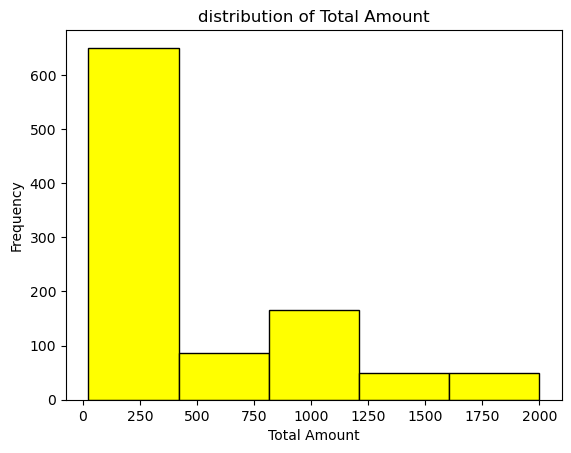

In [41]:
plt.hist(rs["Total Amount"],bins = 5,color = "yellow",edgecolor = "black")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.title("distribution of Total Amount")
plt.show()

**Question 14**           Observations of monthly sales

**Observations:**

**Fluctuations throughout the year:**

1)The sales values rise and fall irregularly, indicating no perfectly stable trend.

2)There are noticeable spikes in May and October–November.

**Seasonality:**

1)Sales appear higher in May (a peak).

2)Another rise occurs in October–November, which could be linked to festive/holiday season sales (like Diwali in India, or year-end shopping globally).

3)The dip in September suggests a slowdown before the festive surge.

**Anomalies:**

1)May shows an unusually high spike compared to adjacent months (possible seasonal promotion or anomaly).

2)September has a sharp dip (possible low demand or data issue).

**Overall trend:**

Despite the fluctuations, the fitted line shows a slightly upward trend, suggesting sales are gradually increasing over the year.

**Question 15**    Observation of categorial sales

**Observations:**

**Revenue Contribution by Groups (Categories):**

->Electronics and Clothing generate the highest total revenue, nearly equal.

->Beauty contributes the least, but still a significant share.

**Key Insights:**

->Electronics & Clothing are the main revenue drivers.

->Beauty contributes less overall, but has occasional high-value purchases.

**This suggests Electronics & Clothing bring steady revenue, while Beauty may rely on fewer, bigger purchases.**

**Question 16**     suggestions

1. **Strengthen Seasonal Sales Campaigns**

**Observation:** Peaks in May and Oct–Nov show seasonal/festival boosts.

**Action:**

->Launch targeted campaigns before and during these months (festival promotions, bundle offers).

->Run “early-bird” sales in September to counter the sales dip.

2. **Focus on High-Revenue Categories (Electronics & Clothing)**

**Observation:** Electronics and Clothing drive most revenue, with stable spending.

**Action:**

->Offer premium product bundles (e.g., clothing + accessories).

->Push extended warranties, cross-sells (e.g., phone + case, laptop + bag).

3. **Unlock Growth in Beauty Segment**

**Observation:** Beauty contributes less overall but shows high transaction variability (some customers spend big).

**Action:**

->Identify high-value beauty buyers and target them with exclusive offers (VIP beauty box, subscription model).

->Use influencer/Instagram campaigns to capture younger, trend-driven customers.

4. **Personalize Marketing for High-Value Customers**

**Action:**

->Use past purchase data to segment customers (e.g., frequent electronics buyers, luxury beauty shoppers).

->Send personalized recommendations and early access to new launches.

->Offer tiered loyalty programs (Gold, Platinum customers).

5. **Reduce Variability & Increase Consistency**

**Observation:** Beauty has inconsistent spending.

**Action:**

->Introduce subscription or membership models (monthly beauty kits).

->Run “Buy more, save more” schemes to encourage larger basket sizes.